In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [37]:
#Load the data 
bitcoin = pd.read_csv('bitcoin.csv')
bitcoin.head()

,A_DATE,B_OPEN,C_HIGH,D_LOW,E_CLOSE,F_VOLUME,H_MARKETCAP
0,"Nov 18, 2020","17,645.19","18,393.95","17,352.91","17,804.01","49,064,800,278","330,218,014,062"
1,"Nov 17, 2020","16,685.69","17,782.92","16,564.54","17,645.41","39,006,849,170","327,257,094,857"
2,"Nov 16, 2020","15,955.58","16,816.18","15,880.71","16,716.11","31,526,766,675","309,889,423,249"
3,"Nov 15, 2020","16,068.14","16,123.11","15,793.53","15,955.59","23,653,867,583","295,790,551,598"
4,"Nov 14, 2020","16,317.81","16,317.81","15,749.19","16,068.14","27,481,710,135","297,877,068,423"


In [38]:
#Because the orginal csv has the alphabet in the front of each column, so we just rename all the columns for easy-reading
bitcoin.rename(columns = {'A_DATE': 'DATE', 'B_OPEN' : 'OPEN', 'C_HIGH':'HIGH', 'D_LOW': 'LOW', 'E_CLOSE': 'CLOSE', 'F_VOLUME':'VOLUME', 'H_MARKETCAP':'MARKETCAP'}, inplace = True)
bitcoin.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKETCAP
0,"Nov 18, 2020","17,645.19","18,393.95","17,352.91","17,804.01","49,064,800,278","330,218,014,062"
1,"Nov 17, 2020","16,685.69","17,782.92","16,564.54","17,645.41","39,006,849,170","327,257,094,857"
2,"Nov 16, 2020","15,955.58","16,816.18","15,880.71","16,716.11","31,526,766,675","309,889,423,249"
3,"Nov 15, 2020","16,068.14","16,123.11","15,793.53","15,955.59","23,653,867,583","295,790,551,598"
4,"Nov 14, 2020","16,317.81","16,317.81","15,749.19","16,068.14","27,481,710,135","297,877,068,423"


In [39]:
#Get the size of the csv
size_in_kb = os.path.getsize('bitcoin.csv')/1024
size_in_kb

101.33984375

In [40]:
#Take a look at number of rows and columns in the csv as well as the null value
#So there are 1098 rows and 7 columns, and it seems like we dont have any null value in the dataset, but we have to be careful with the string value in the dataset because all the values were in object type
#So it is better if we convert the columns containing number to numercial type
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       1098 non-null   object
 1   OPEN       1098 non-null   object
 2   HIGH       1098 non-null   object
 3   LOW        1098 non-null   object
 4   CLOSE      1098 non-null   object
 5   VOLUME     1098 non-null   object
 6   MARKETCAP  1098 non-null   object
dtypes: object(7)
memory usage: 60.2+ KB


In [41]:
#Only the date column doesn't contain numerical values, so we convert the others to numeric type
#First, remove the commma which stands for thousands

for col in bitcoin.columns[1:]:
    bitcoin[col] = bitcoin[col].map(lambda x: x.replace(',', ''))
    bitcoin[col] = pd.to_numeric(bitcoin[col], errors = 'coerce')
bitcoin.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKETCAP
0,"Nov 18, 2020",17645.19,18393.95,17352.91,17804.01,49064800278,330218014062
1,"Nov 17, 2020",16685.69,17782.92,16564.54,17645.41,39006849170,327257094857
2,"Nov 16, 2020",15955.58,16816.18,15880.71,16716.11,31526766675,309889423249
3,"Nov 15, 2020",16068.14,16123.11,15793.53,15955.59,23653867583,295790551598
4,"Nov 14, 2020",16317.81,16317.81,15749.19,16068.14,27481710135,297877068423


In [42]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       1098 non-null   object 
 1   OPEN       1098 non-null   float64
 2   HIGH       1098 non-null   float64
 3   LOW        1098 non-null   float64
 4   CLOSE      1098 non-null   float64
 5   VOLUME     1098 non-null   int64  
 6   MARKETCAP  1098 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 60.2+ KB


In [65]:
#Now let's take a look into descriptive statistics
bitcoin.describe()

,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKETCAP
count,1098.000000,1098.000000,1098.000000,1098.000000,1.098000e+03,1.098000e+03
mean,8394.912577,8599.598679,8175.038515,8403.855965,1.746238e+10,1.489965e+11
std,2884.569546,3003.314913,2749.269093,2898.616166,1.302409e+10,5.189536e+10
min,3236.270000,3275.380000,3191.300000,3236.760000,2.923670e+09,5.640069e+10
25%,6530.860000,6626.432500,6448.182500,6529.727500,5.900701e+09,1.130917e+11
50%,8279.360000,8451.995000,8102.605000,8273.410000,1.515578e+10,1.465872e+11
75%,10113.720000,10293.952500,9733.582500,10116.497500,2.444321e+10,1.802890e+11
max,19475.800000,20089.000000,18974.100000,19497.400000,7.415677e+10,3.302180e+11


In [ ]:
palette = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

<AxesSubplot:ylabel='MARKETCAP'>

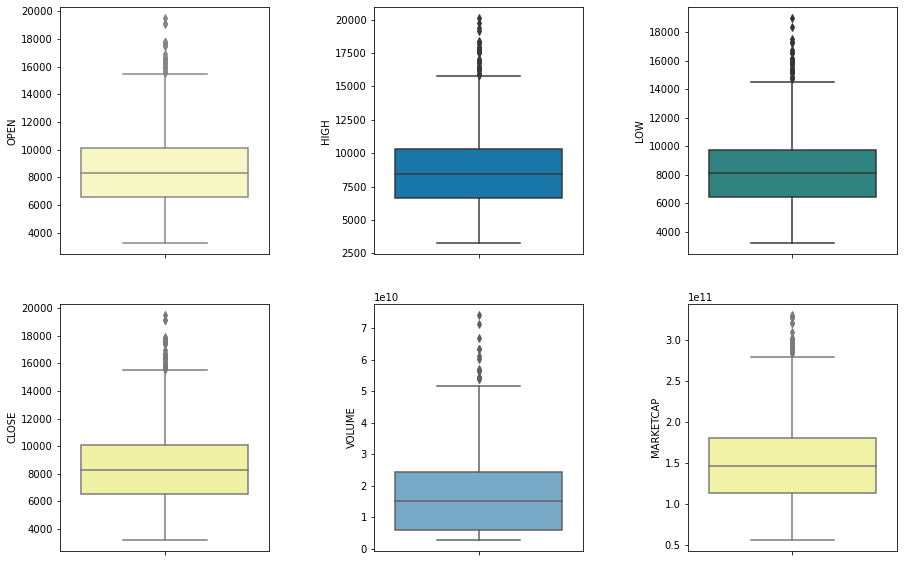

In [64]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
plt.subplots_adjust(wspace = 0.5)

sns.boxplot(y = 'OPEN', data = bitcoin, palette = 'Spectral', ax = axes[0,0])
sns.boxplot(y = 'HIGH', data = bitcoin, palette = 'winter_r', ax = axes[0,1])
sns.boxplot(y = 'LOW', data = bitcoin, palette = 'viridis', ax = axes[0,2])
sns.boxplot(y = 'CLOSE', data = bitcoin, palette = 'terrain', ax = axes[1,0])
sns.boxplot(y = 'VOLUME', data = bitcoin, palette = 'Blues', ax = axes[1,1])
sns.boxplot(y = 'MARKETCAP', data = bitcoin, palette = 'Accent_r', ax = axes[1,2])